In [2]:
from os import getcwd
from pathlib import Path
import sys
import numpy as np

# Utile pour le débogage
# Besoin de pointer le répertoire de développement plutôt que le répertoire de distribution utilisé par Pypi
#
# Commenter la ligne suivante pour utiliser le répertoire de distribution
sys.path.insert(0, str(Path('D:\ProgrammationGitLab\HECEPython')))

# Répertoire courant

In [3]:
print(getcwd())

d:\ProgrammationGitLab\HECEPython\docs\source\_static\2d


# Répertoires de travail (in et out)

In [4]:
dir_in  = Path(getcwd()) / "../examples/2d/fish_hydro"
dir_out = dir_in / "gpu"

print("Dir in :", dir_in)
print("Dir out:", dir_out)

Dir in : d:\ProgrammationGitLab\HECEPython\docs\source\_static\2d\..\examples\2d\fish_hydro
Dir out: d:\ProgrammationGitLab\HECEPython\docs\source\_static\2d\..\examples\2d\fish_hydro\gpu


# Ouverture d'une modélisation 2D CPU

Import du module utile

In [5]:
from wolfhece.mesh2d.wolf2dprev import prev_sim2D

Instanciation de l'objet Wolf2DModel avec passage du **répertoire et du nom générique (sans extension)** de simulation en argument (en chaîne de texte pas en objet Path)

In [11]:

mymodel = prev_sim2D(fname = str(dir_in / "MeryCalcul"))

Un peu d'aide sur ce que contiennent les fichiers ?

In [12]:
print(mymodel.help_files())

Text files
----------
Infiltration hydrographs [m³/s] : .fil
Resulting mesh [-] : .mnap
Translation to real world [m] : .trl


Fine array - monoblock
----------------------
Mask [-] : .napbin [int16]
Bed Elevation [m] : .top [float32]
Bed Elevation - computed [m] : .topini_fine [float32]
Roughness coefficient [law dependent] : .frot [float32]
Infiltration zone [-] : .inf [int32]
Initial water depth [m] : .hbin [float32]
Initial discharge along X [m^2/s] : .qxbin [float32]
Initial discharge along Y [m^2/s] : .qybin [float32]
Rate of dissipation [m²/s³] : .epsbin [float32]
Turbulent kinetic energy [m²/s²] : .kbin [float32]
Z level under the deck of the bridge [m] : .bridge [float32]


Multiblock arrays
-----------------
MB - Bed elevation [m] : .topini [float32]
MB - Water depth [m] : .hbinb [float32]
MB - Discharge X [m²/s] : .qxbinb [float32]
MB - Discharge Y [m²/s] : .qybinb [float32]
MB - Roughness coeff : .frotini [float32]
MB - Rate of dissipation [m²/s³] : .epsbinb [float32]
MB - 

## Caractéristiques du modèle

Matrices "fines" - non multiblocs

In [14]:
myhead = mymodel.get_header()
print(myhead)

Shape  : 376 x 439 
Resolution  : 0.5 x 0.5 
Spatial extent : 
   - Origin : (2.0 ; 3.5) 
   - End : (190.0 ; 223.0) 
   - Widht x Height : 188.0 x 219.5 
   - Translation : (236135.0 ; 138390.0)
Null value : 0.0




Matrices multiblocs

In [15]:
myheadMB = mymodel.get_header_MB()
print(myheadMB)

Shape  : 376 x 439 
Resolution  : 0.5 x 0.5 
Spatial extent : 
   - Origin : (2.0 ; 3.5) 
   - End : (190.0 ; 223.0) 
   - Widht x Height : 188.0 x 219.5 
   - Translation : (236135.0 ; 138390.0)
Null value : 0.0

Number of blocks : 6

Block block1 : 

Shape  : 376 x 439 
Resolution  : 0.5 x 0.5 
Spatial extent : 
   - Origin : (0.0 ; 0.0) 
   - End : (188.0 ; 219.5) 
   - Widht x Height : 188.0 x 219.5 
   - Translation : (236137.0 ; 138393.5)
Null value : 0.0

Block block2 : 

Shape  : 158 x 115 
Resolution  : 0.5 x 0.5 
Spatial extent : 
   - Origin : (42.5 ; 125.0) 
   - End : (121.5 ; 182.5) 
   - Widht x Height : 79.0 x 57.5 
   - Translation : (236137.0 ; 138393.5)
Null value : 0.0

Block block3 : 

Shape  : 8 x 8 
Resolution  : 0.5 x 0.5 
Spatial extent : 
   - Origin : (45.0 ; 175.0) 
   - End : (49.0 ; 179.0) 
   - Widht x Height : 4.0 x 4.0 
   - Translation : (236137.0 ; 138393.5)
Null value : 0.0

Block block4 : 

Shape  : 12 x 11 
Resolution  : 0.5 x 0.5 
Spatial extent :

## Vérifie si une simulation contient plus d'un seul bloc

In [16]:
print("Plus qu'un bloc? : ", mymodel.is_multiblock)
print('Nombre de blocs : ', mymodel.nb_blocks)

Plus qu'un bloc? :  True
Nombre de blocs :  6


## Vérification de l'infiltration

In [17]:
ret = mymodel.check_infiltration()
print(ret)

inside .inf binary file
-----------------------
Maximum infiltration zone : 9
Zone 1 : 66 cells -- Indices (i,j) of the zone's first cell (279 ; 22) (1-based)
Zone 2 : 8 cells -- Indices (i,j) of the zone's first cell (43 ; 420) (1-based)
Zone 3 : 8 cells -- Indices (i,j) of the zone's first cell (241 ; 253) (1-based)
Zone 4 : 5 cells -- Indices (i,j) of the zone's first cell (265 ; 218) (1-based)
Zone 5 : 1 cells -- Indices (i,j) of the zone's first cell (95 ; 354) (1-based)
Zone 6 : 6 cells -- Indices (i,j) of the zone's first cell (138 ; 326) (1-based)
Zone 7 : 6 cells -- Indices (i,j) of the zone's first cell (175 ; 301) (1-based)
Zone 8 : 1 cells -- Indices (i,j) of the zone's first cell (238 ; 260) (1-based)
Zone 9 : 130 cells -- Indices (i,j) of the zone's first cell (96 ; 354) (1-based)

inside .fil text file
----------------------
Zones : 9
Time steps : 2



D:\ProgrammationGitLab\HECEPython\wolfhece\mesh2d\wolf2dprev.py:8098: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(<Figure size 640x480 with 1 Axes>, <AxesSubplot: >)

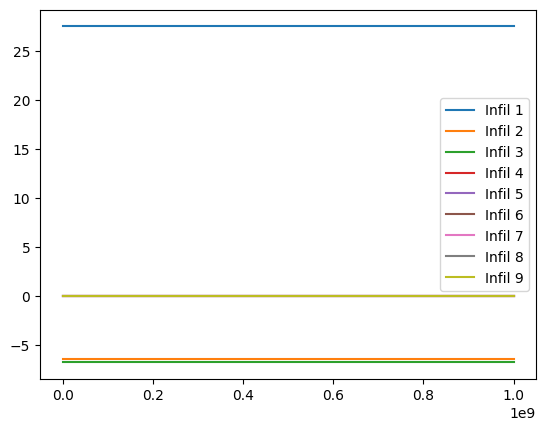

In [18]:
mymodel.infiltration.plot_plt()

## Récupération d'un fichier particulier

In [19]:
top = mymodel.read_fine_array(which = '.top')
h   = mymodel.read_fine_array(which = '.hbin')
qx  = mymodel.read_fine_array(which = '.qxbin')
qy  = mymodel.read_fine_array(which = '.qybin')
inf = mymodel.read_fine_array(which = '.inf')
frott = mymodel.read_fine_array(which = '.frot')

all_data = [top, h, qx, qy, inf, frott]

Chaque variable est de type "WolfArray"...

In [20]:
for cur in all_data:
    print(type(cur))

<class 'wolfhece.wolf_array.WolfArray'>
<class 'wolfhece.wolf_array.WolfArray'>
<class 'wolfhece.wolf_array.WolfArray'>
<class 'wolfhece.wolf_array.WolfArray'>
<class 'wolfhece.wolf_array.WolfArray'>
<class 'wolfhece.wolf_array.WolfArray'>


## Manipulation de données

La matrice est stockée dans l'attribut "array" de chaque objet.

Il s'agit d'une matrice masquée --> voir module numpy.ma au besoin : https://numpy.org/doc/stable/reference/maskedarray.generic.html

In [21]:
np_ma_top = top.array
print(type(np_ma_top))

<class 'numpy.ma.core.MaskedArray'>


Une matrice Numpy "sans masque" peut être obtenue sur base de l'attribut data ou en faisant une copie.

ATTENTION aux effets de partage ou pas de la mémoire...

In [22]:
np_top = top.array.data
print(type(np_top))

np_top2 = top.array.data.copy()
print(type(np_top2))

np_top[1,1] = -1
assert(np_top[1,1] == top.array.data[1,1]), "Memory share --> same value in data"

np_top2[1,1] = -2
assert(np_top2[1,1] != top.array.data[1,1]), "Memory copy --> different value in data"


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Typage

Toutes les matrices ne contiennent pas nécessairement les mêmes **types** de données

- Float32 --> 4 octets par valeur
- Int32   --> 4 octets par valeur
- Int16   --> 2 octets par valeur

In [23]:
for cur in all_data:
    print(cur.array.dtype)

float32
float32
float32
float32
int32
float32


## Recopiage des matrices fines pour une simulation GPU

In [24]:
ret = mymodel.copy2gpu(dir_out)
print(ret)

.inf --> infiltration_zones.npy [np.int32]
.frot --> manning.npy [np.float32]
.hbin --> h.npy [np.float32]
.qxbin --> qx.npy [np.float32]
.qybin --> qy.npy [np.float32]
.napbin --> nap.npy [np.uint8]
.top --> bathymetry.npy [np.float32]
Force a value 99999. outside nap

52831 active cells in bathymetry.npy
All files copied successfully


Vérification du type

In [25]:
gpufiles = [('bathymetry.npy', np.float32),
         ('manning.npy' , np.float32),
         ('h.npy', np.float32),
         ('qx.npy', np.float32),
         ('qy.npy', np.float32),
         ('infiltration_zones.npy', np.int32),
         ('nap.npy', np.uint8)
         ]

for curfile, curtype in gpufiles:
    cur:np.ndarray = np.load(dir_out / curfile)
    assert cur.dtype == curtype, f"Type mismatch for {curfile} : {cur.dtype} != {curtype}"

# Il reste à ...
 
- créer une simulation GPU sur base des fichiers recopiés
- paramétrer la simulation GPU avec :
  - des conditions aux imites ad-hoc
  - des débits d'infiltration/exfiltration
  - le mode de calcul
  - ...

**A vous de jouer !**
